In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [2]:
#gen data

numObjects = 6
numTimesteps = 27
times = np.arange(numTimesteps)
objPosArr = np.empty([numObjects,2,numTimesteps])

for i in range(numObjects):
    x = np.linspace(np.random.random()+np.random.randint(0,10), 10*np.random.random()-np.random.randint(2,5), numTimesteps)
    y = np.linspace(np.random.random()+np.random.randint(0,4), 12*np.random.random(), numTimesteps)
    objPosArr[i,0] = x
    objPosArr[i,1] = y


limits = [0,np.max(objPosArr)+1,0, np.max(objPosArr)+1]

In [3]:
def plotExpectedPos(posArr, times, lims):
    fig, ax = plt.subplots(1,figsize =(12,12))

    
    ax.set_xlim([lims[0],lims[1]])
    ax.set_ylim([lims[2],lims[3]])

    markers = itertools.cycle((".","x","^","*","+","v","o", "<", ">"))
    for i in range(posArr.shape[0]):
        ax.scatter(posArr[i,0],posArr[i,1], marker=next(markers), c=times, cmap="plasma")

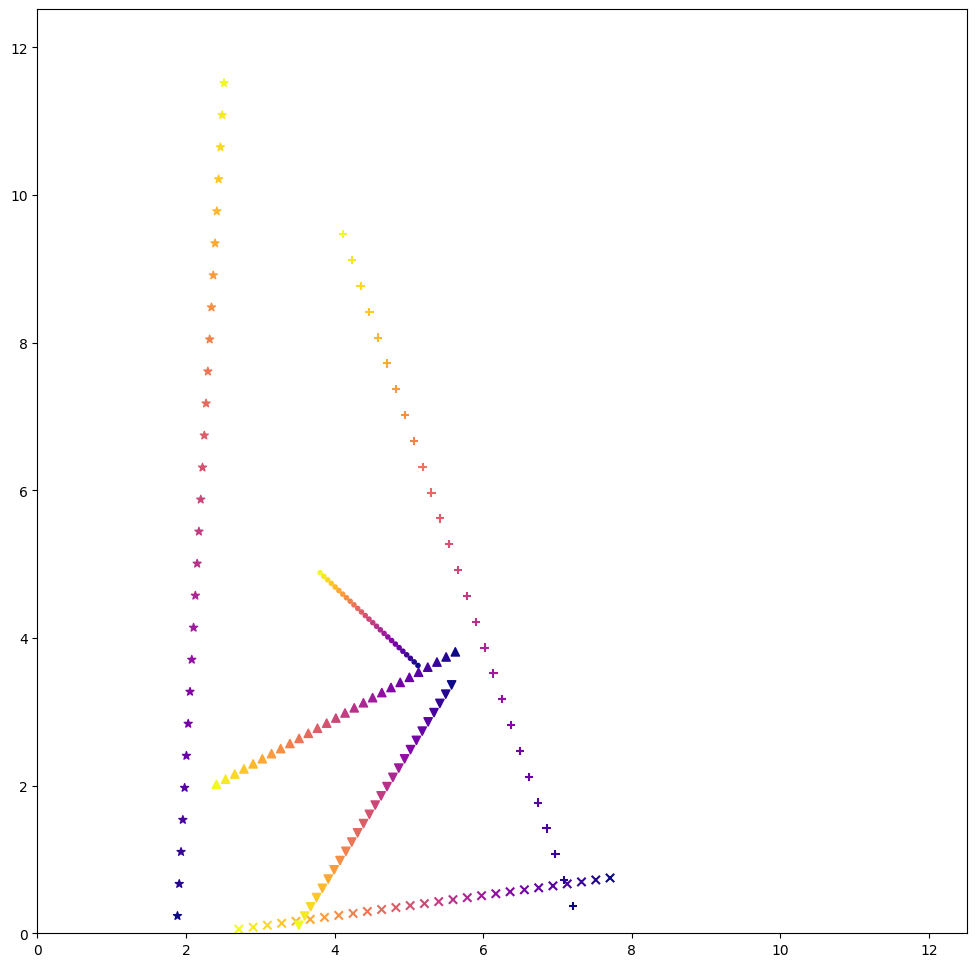

In [4]:
plotExpectedPos(objPosArr, times, limits)

TESS 27	07/04/20-07/30/20	326.85, -72.43, 214.51	301.60, -38.68, 282.66	312.45, -61.74, 291.17	8.60, -79.81, 165.21	90.01, -66.56, 244.53	

In [5]:
from find_asteroid import Skybotquery
from find_asteroid import MPCquery
import pandas as pd
ra, dec = 301.60, -38.68

#dates to JD?

date = 2458957.0 #17/04/20

# resultSB = Skybotquery(ra, dec, date, location="tess")

resultMP = MPCquery(ra,dec,date, 300, limit="20.0",obscode="C57")
resultMP.drop(resultMP.tail(1).index, inplace=True)

array([58956., 58961., 58966., 58971., 58976.])

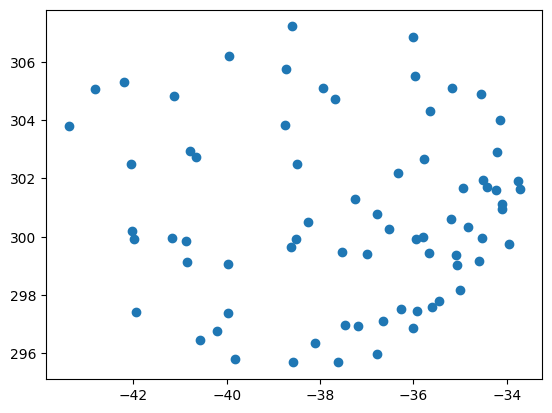

In [63]:
from astropy.coordinates import SkyCoord
import astropy.units as u
# import astropy.wcs as wcs
# from astropy.wcs import WCS
from astropy.time import Time

coords = SkyCoord(resultMP["RA"], resultMP["Dec"], unit=(u.hourangle,u.deg))

tabCor = coords.to_table()

plt.scatter(coords.dec, coords.ra)


t_i=Time("2020-04-17T00:00:00.000", format='isot', scale='utc')

t_i.mjd

dt = 5*u.day

timeList = t_i + dt*np.arange(0,5)
timeList.mjd

In [148]:
ra, dec = 301.60, -38.68

t_i=Time("2020-04-17T00:00:00.000", format='isot', scale='utc')

t_i.mjd

dt = 1*u.day

timeList = t_i + dt*np.arange(0,27)


resList = []
for i in timeList.jd:  
    queryRes = MPCquery(ra,dec,i, 300, limit="18.0",obscode="C57")
    resList.append(queryRes)



In [6]:
namesList = []

for i in range(len(resList)):
    namesList.append(resList[i]["name"])

namesList = [resList[i]["name"] for i in range(len(resList))]

names = pd.concat(namesList)

unqNames = pd.unique(names)

unqNames = np.delete(unqNames, np.where(unqNames==""))

In [150]:
valList = []
for j, name in enumerate(unqNames):    
    if name == "":
        continue
    raList = []
    decList = []
    for i in range(len(resList)):
        df = resList[i]
        index= df.index[df["name"]==name]
        try:
            raList.append(df.iloc[index[0]]["RA"])
            decList.append(df.iloc[index[0]]["Dec"])
        except:
            raList.append(np.nan)
            decList.append(np.nan)
        

    valList.append([name, raList, decList])



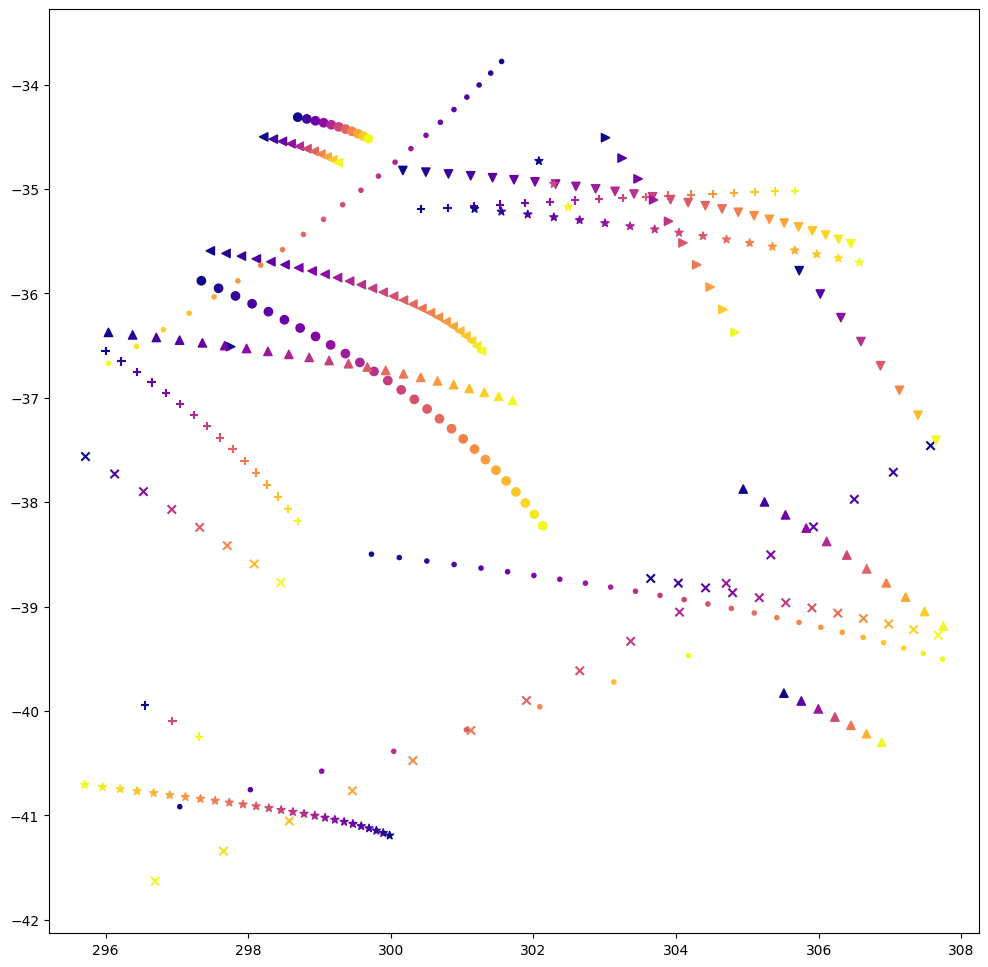

In [152]:
numObjects = unqNames.shape[0]-1
numTimesteps = 27
objPosArr = np.empty([numObjects,2,numTimesteps])


for i in range(numObjects):
    ra = valList[i][1]
    dec = valList[i][2]

    coords = SkyCoord(ra, dec, unit=(u.hourangle,u.deg))
    objPosArr[i,0] = coords.ra
    objPosArr[i,1] = coords.dec


limits = [np.nanmin(objPosArr[:,0,:])-0.5,np.nanmax(objPosArr[:,0,:])+0.5,np.nanmin(objPosArr[:,1,:])-0.5,np.nanmax(objPosArr[:,1,:])+0.5]



plotExpectedPos(objPosArr, timeList.jd, limits)



In [3]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.time import Time
from find_asteroid import MPCquery
import pandas as pd


def plotExpectedPos(posArr, times, lims):
    fig, ax = plt.subplots(1,figsize =(12,12))

    
    ax.set_xlim([lims[0],lims[1]])
    ax.set_ylim([lims[2],lims[3]])

    markers = itertools.cycle((".","x","^","*","+","v","o", "<", ">"))
    for i in range(posArr.shape[0]):
        ax.scatter(posArr[i,0],posArr[i,1], marker=next(markers), c=times, cmap="plasma")

ra_i, dec_i = 301.60, -38.68
numTimesteps = 3
t_i=Time("2020-04-17T00:00:00.000", format='isot', scale='utc')

t_i.mjd

dt = (27/numTimesteps)*u.day

timeList = t_i + dt*np.arange(0,numTimesteps)

# resList = []
# for i in timeList.jd:  
#     queryRes = MPCquery(ra,dec,i, 300, limit="18.0",obscode="C57")
#     resList.append(queryRes)

# namesList = []
# for i in range(len(resList)):
#     namesList.append(resList[i]["name"])
# namesList = [resList[i]["name"] for i in range(len(resList))]
# names = pd.concat(namesList)
# unqNames = pd.unique(names)


# valList = []
# for j, name in enumerate(unqNames):    
#     if name == "":
#         continue
#     raList = []
#     decList = []
#     for i in range(len(resList)):
#         df = resList[i]
#         index= df.index[df["name"]==name]
#         try:
#             raList.append(df.iloc[index[0]]["RA"])
#             decList.append(df.iloc[index[0]]["Dec"])
#         except:
#             raList.append(np.nan)
#             decList.append(np.nan)
#     valList.append([name, raList, decList])

# numObjects = unqNames.shape[0]-1
# objPosArr = np.empty([numObjects,2,numTimesteps])

# for i in range(numObjects):
#     ra = valList[i][1]
#     dec = valList[i][2]

#     coords = SkyCoord(ra, dec, unit=(u.hourangle,u.deg))
#     objPosArr[i,0] = coords.ra
#     objPosArr[i,1] = coords.dec


# limits = [np.nanmin(objPosArr[:,0,:])-0.5,np.nanmax(objPosArr[:,0,:])+0.5,np.nanmin(objPosArr[:,1,:])-0.5,np.nanmax(objPosArr[:,1,:])+0.5]



# plotExpectedPos(objPosArr, timeList.jd, limits)


In [63]:
from find_asteroid import Skybotquery
from find_asteroid import MPCquery
from astropy.time import Time
import astropy.units as u
import numpy as np

ra_i, dec_i = 301.60, -38.68
numTimesteps = 27
t_i=Time("2020-04-17T00:00:00.000", format='isot', scale='utc')
dt = (27/numTimesteps)*u.day

timeList = t_i + dt*np.arange(0,numTimesteps)


result = Skybotquery(ra_i, dec_i, timeList.jd, radius=10, location="C57")
brightResult = result.loc[result["Mv"]<= 20]

# queryRes = MPCquery(ra_i,dec_i,t_i, 300, limit="18.0",obscode="C57")




Querying for SSOs: 100%|██████████| 27/27 [01:15<00:00,  2.79s/it]


In [64]:
import pandas as pd 
from astropy.coordinates import SkyCoord
import matplotlib.colors as mplc
import matplotlib.pyplot as plt
import itertools

magLim = 20.0

brightResult = result.loc[result["Mv"]<= magLim].reset_index(drop=True)
# brightResult.drop("index", axis=1, inplace=True)

unqNames = pd.unique(brightResult["Name"])


coords = SkyCoord(brightResult["RA"], brightResult["Dec"], unit=(u.hourangle,u.deg))

brightResult = brightResult.assign(degRA=coords.ra.deg)
brightResult = brightResult.assign(degDec=coords.dec.deg)




 
 


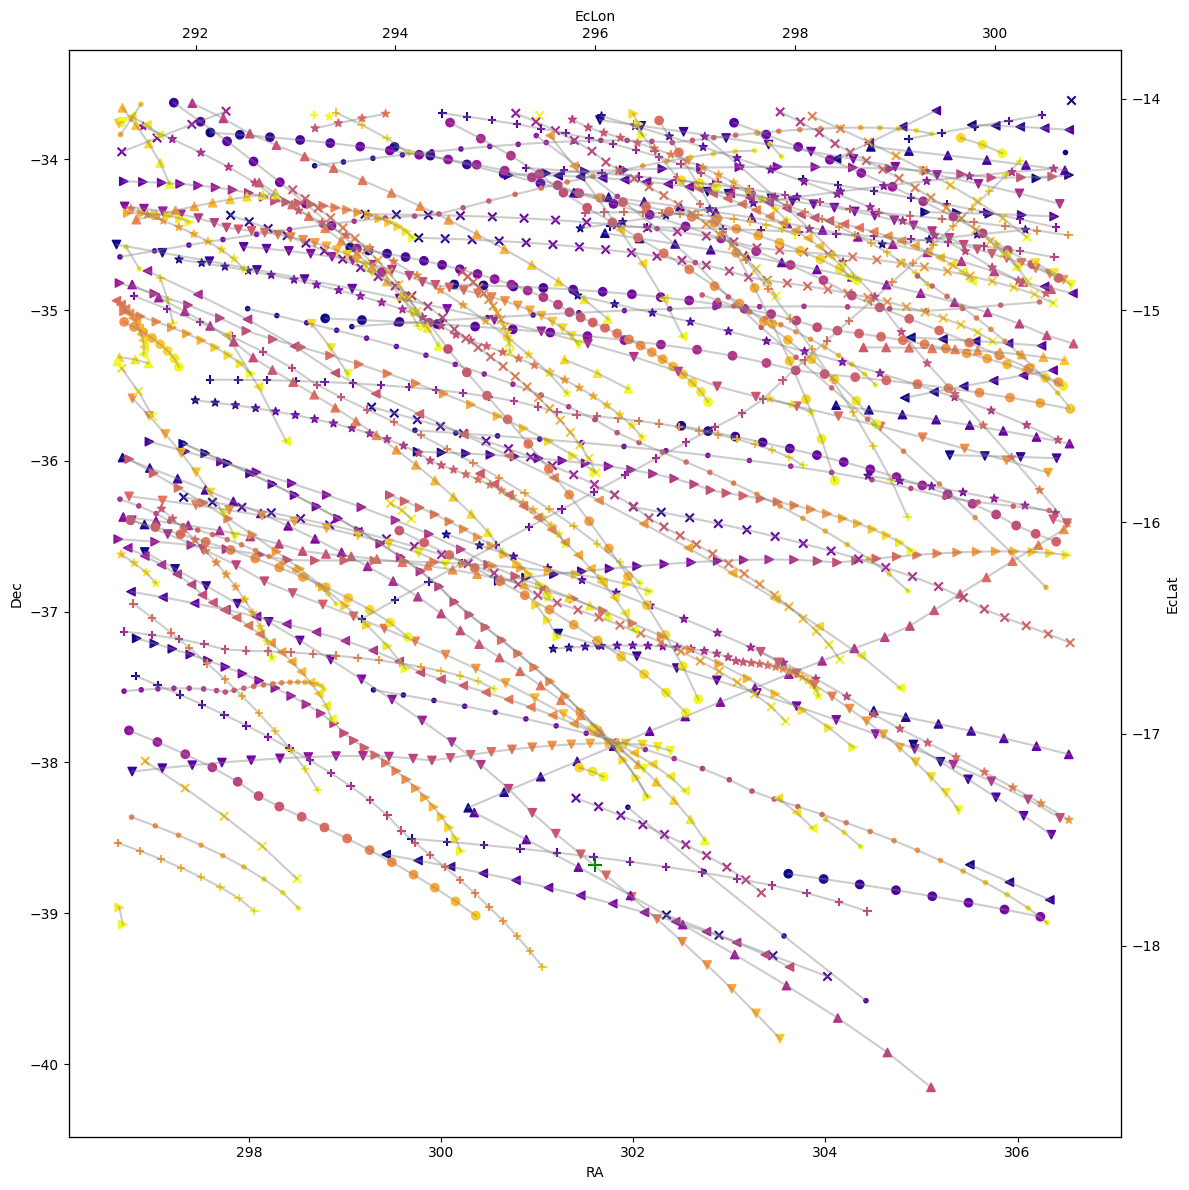

In [20]:

#* NOT USING WCS

fig, ax = plt.subplots(1,figsize =(12,12))

ax.set_xlabel("RA")
ax.set_ylabel("Dec")



ax2 = ax.twinx()
ax3 = ax2.twiny()


ax3.set_xlabel("EcLon")
ax2.set_ylabel("EcLat")


# ax.set_xlim([lims[0],lims[1]])
# ax.set_ylim([lims[2],lims[3]])
cnorm = mplc.Normalize(np.min(timeList.jd), np.max(timeList.jd))
markers = itertools.cycle((".","x","^","*","+","v","o", "<", ">"))
for i, name in  enumerate(unqNames):

    nameIDs = brightResult.index[brightResult["Name"]==name]

    coords = SkyCoord(brightResult.loc[nameIDs]["RA"],
                      brightResult.loc[nameIDs]["Dec"], unit=(u.hourangle,u.deg))

    ecliptCoords = coords.transform_to('geocentrictrueecliptic') #?????
    
    if len(nameIDs)>0:
        ax.plot(coords.ra.deg, coords.dec.deg, c="grey", alpha=0.4)
        ax.scatter(coords.ra.deg, coords.dec.deg, marker=next(markers), c=brightResult.loc[nameIDs]["epoch"], cmap="plasma", norm=cnorm)
ax.scatter(ra_i, dec_i, marker="+", s=100, c="g") #Center of seach area


raMin, raMax = ax.get_xlim()
decMin, decMax = ax.get_ylim()
limCoords = SkyCoord([raMin, raMax], [decMin,decMax], frame="icrs", unit="deg", obstime=Time(np.median(brightResult["epoch"]), format="jd"))
   

limEclpCoords = limCoords.transform_to("geocentrictrueecliptic")

# limEclpCoords.lon.deg
ax3.set_xlim(limEclpCoords.lon.deg)
ax3.set_ylim(limEclpCoords.lat.deg)

#// TODO ecliptic lat/long on axis. ASTROpy does it for you. 

fig.tight_layout()
fig.savefig(f"./maybeWithEclipticCoords.png") #!I don't think this is correct

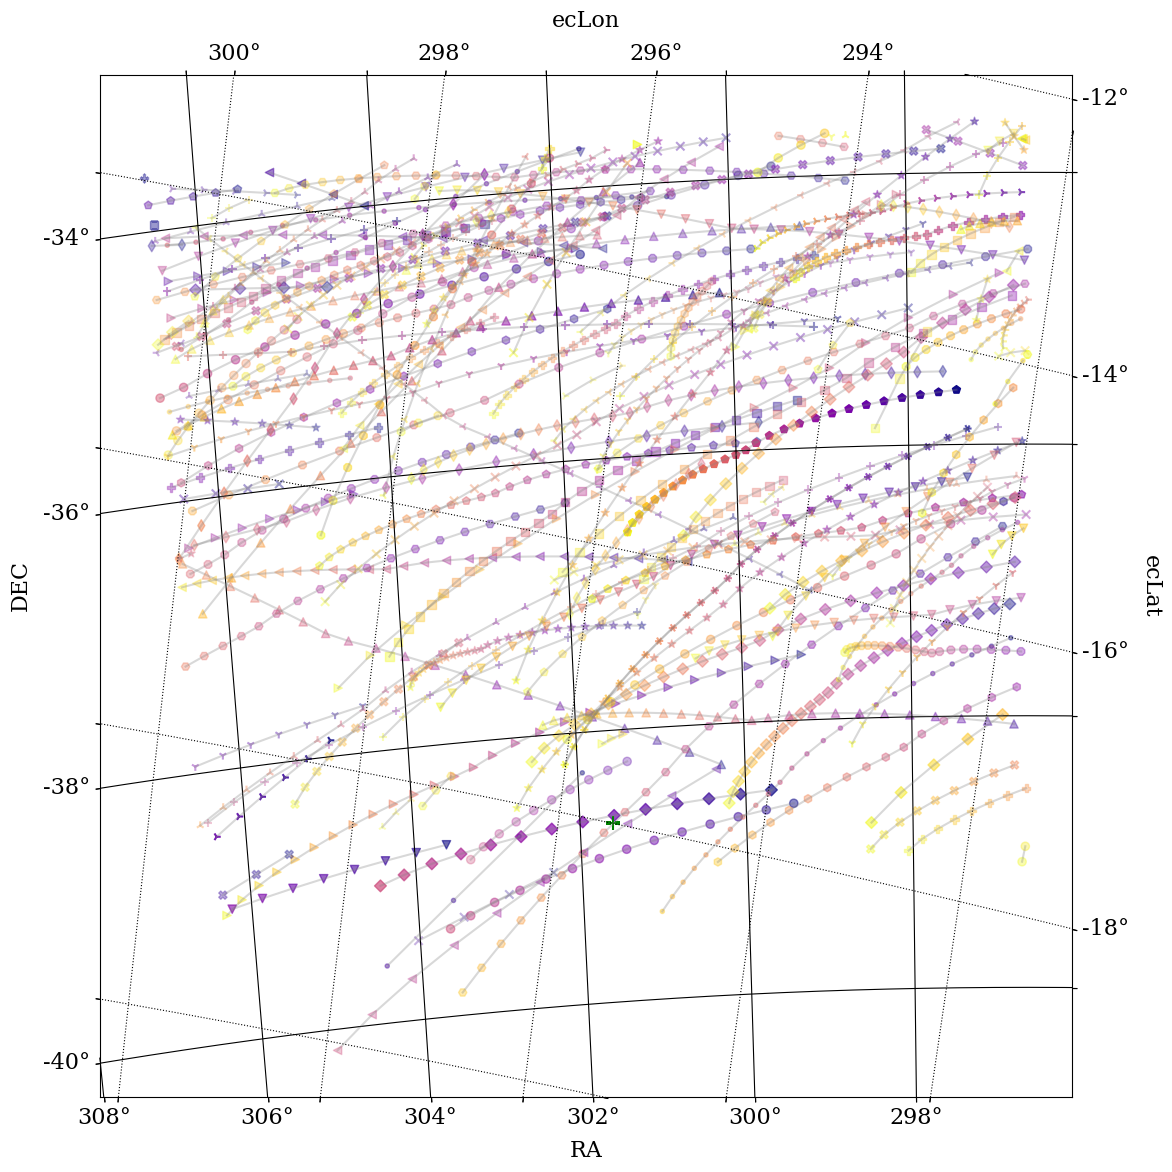

In [62]:

#* USING WCS
from astropy import wcs
 
w = wcs.WCS(naxis=2)

#setting FITS keywords #!guessing what they mean
w.wcs.crpix = [0,0]
w.wcs.crval = [brightResult["degRA"].min(), brightResult["degDec"].min()]
w.wcs.cdelt = np.array([-0.066667, 0.066667])
w.wcs.mjdref = [brightResult["epoch"].mean(),0]



#proj. things
w.wcs.ctype = ["RA---AIR", "DEC--AIR"]
w.wcs.set_pv([(2, 1, 45.0)])


plt.rcParams.update({
    "font.size": 16,
    "font.family": "serif",
    "figure.autolayout": True,
    "axes.grid": False,
    # "xtick.minor.visible": True,
    # "ytick.minor.visible": True,
})

#Set up figure with WCS
fig= plt.figure(figsize=(12,12))
ax = fig.add_subplot(111,projection = w)
ax.grid(color='black', ls='solid')
ax.set_xlabel("RA")
ax.coords[0].set_format_unit(u.deg)
ax.set_ylabel("DEC")

#Set up overlay coords
overlay = ax.get_coords_overlay('geocentrictrueecliptic')
overlay.grid(color='black', ls='dotted')
overlay[0].set_axislabel('ecLon')
overlay[1].set_axislabel('ecLat')

cnorm = mplc.Normalize(np.min(timeList.jd), np.max(timeList.jd))# The delta T of the data, and makes a norm for a cmap 
markers = itertools.cycle((".","x","^","*","D","+","v","o", "<", ">","H","1","2","3","4","8","X","p","d","s","P","h"))#lots of symbols so they aren't repeated much

#setup for possible alpha scaling
scaleAlpha = True
scaleMult = 0.7 #changes how small alpha can get
brightest = brightResult["Mv"].min()
deltaMag = magLim-brightest

minLen = 0 #min number of times observed to plot

for i, name in  enumerate(unqNames):

    nameIDs = brightResult.index[brightResult["Name"]==name]

    coords = SkyCoord(brightResult.loc[nameIDs]["degRA"],
                      brightResult.loc[nameIDs]["degDec"], unit=(u.deg,u.deg))
    pixels = coords.to_pixel(w)

    #scales each objects alpha
    avgMag = brightResult.loc[nameIDs]["Mv"].mean()
    if scaleAlpha:
        alpha = (1-scaleMult*((avgMag-brightest)/deltaMag)) #scales the alpha of plotting to the brightness of the object, to give some idea of what might be detected
    else:
        alpha=1


    if len(nameIDs)>minLen:
        ax.plot(pixels[0], pixels[1], c="grey", alpha=0.3) #plots line to help eye track objects
        ax.scatter(pixels[0], pixels[1], marker=next(markers), c=brightResult.loc[nameIDs]["epoch"], cmap="plasma", norm=cnorm, label=name, alpha=alpha) #scatters the pixel coords on wsc set axis, uses different symbol for each, with cmap scaled by the time in the sector.

centerPix = SkyCoord(ra_i,dec_i, unit=(u.deg,u.deg)).to_pixel(w) #center of seach area in pixels
ax.scatter(centerPix[0], centerPix[1], marker="+", s=100, c="g") #center marker

fig.tight_layout()
fig.savefig(f"./ecCoordsandAlphascaled_ra{ra_i}_dec{dec_i}_t{t_i.mjd}_Mv{magLim}.png") #!CHECK

Name=  2019 EE4  didn't work


{' 2000 GQ146 ': 17.43,
 ' 2001 RY46 ': 16.38,
 ' 2004 NS22 ': 15.57,
 ' 1999 OL2 ': 14.23,
 ' Veseli ': 11.69,
 ' 2004 PF104 ': 15.7,
 ' 1991 FY3 ': 11.86,
 ' 2000 OB52 ': 13.52,
 ' 2004 UK4 ': 14.6,
 ' 1996 TH10 ': 14.16,
 ' 1999 EB6 ': 14.49,
 ' Holgermandel ': 14.04,
 ' 1998 UP33 ': 14.47,
 ' 2000 WK72 ': 15.76,
 ' Tanete ': 8.49,
 ' 4218 T-2 ': 14.53,
 ' 2004 VQ76 ': 14.77,
 ' 1999 TG262 ': 13.98,
 ' 2001 FO61 ': 15.62,
 ' 2000 SE179 ': 13.93,
 ' 2000 GD48 ': 14.89,
 ' 2004 RM306 ': 14.59,
 ' 1998 FN75 ': 13.69,
 ' 1998 FA61 ': 14.25,
 ' Cichocki ': 13.18,
 ' 2000 XB40 ': 14.89,
 ' 1998 SE55 ': 12.97,
 ' 2000 CN86 ': 14.73,
 ' 1999 GL53 ': 14.2,
 ' 2000 RQ49 ': 13.94,
 ' 2003 RB2 ': 15.76,
 ' 2003 SR156 ': 15.65,
 ' 2004 TF67 ': 14.53,
 ' Jamesgreen ': 13.68,
 ' 1999 TG31 ': 14.97,
 ' 2019 FD5 ': 10.52,
 ' Magnya ': 10.52,
 ' 1998 QM91 ': 14.85,
 ' 1999 XE123 ': 14.68,
 ' Ilmatar ': 7.85,
 ' 1981 EL32 ': 15.05,
 ' 2001 AE28 ': 14.21,
 ' 1998 RC2 ': 14.0,
 ' 1999 RJ211 ': 14.53,
 '

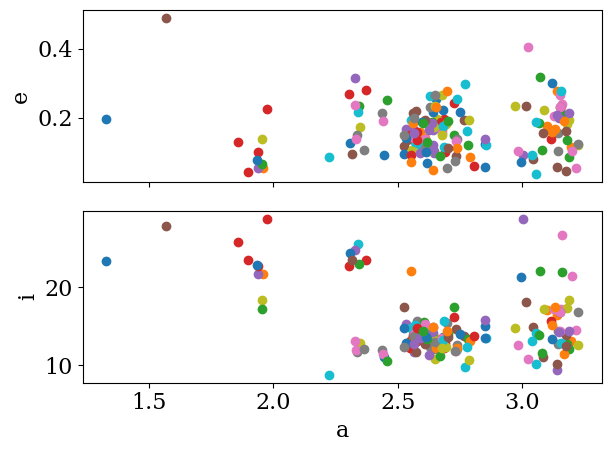

In [111]:
from astroquery.jplhorizons import Horizons
from astropy.time import Time

t_i=Time("2020-04-17T00:00:00.000", format='isot', scale='utc')

name = unqNames[0]

fig, ax = plt.subplots(2, sharex=True)

ax[1].set_xlabel("a")
ax[0].set_ylabel("e")
ax[1].set_ylabel("i")

hs={}

for name in unqNames:
    try:
        horizQ = Horizons(id = name, epochs = t_i.jd, location= "500@10")
        a=horizQ.elements()['a']
        e=horizQ.elements()['e']
        i=horizQ.elements()['incl']
        ax[0].scatter(a,e)
        ax[1].scatter(a,i)
        hs[name] = float(horizQ.elements()['H'])
    except:
        print(f"Name= {name} didn't work")
    

hs
